In [13]:
import pandas as pd
df = pd.read_csv("loan_data_set.csv")
#print (df.head())

                   Total   Percent
Loan_ID                0  0.000000
Gender                13  0.021173
Married                3  0.004886
Dependents            15  0.024430
Education              0  0.000000
Self_Employed         32  0.052117
ApplicantIncome        0  0.000000
CoapplicantIncome      0  0.000000
LoanAmount            22  0.035831
Loan_Amount_Term      14  0.022801
Credit_History        50  0.081433
Property_Area          0  0.000000
Loan_Status            0  0.000000


,Total,Percent
Loan_ID,0,0.000000
Gender,13,0.021173
Married,3,0.004886
Dependents,15,0.024430
Education,0,0.000000


<Figure size 1080x576 with 0 Axes>

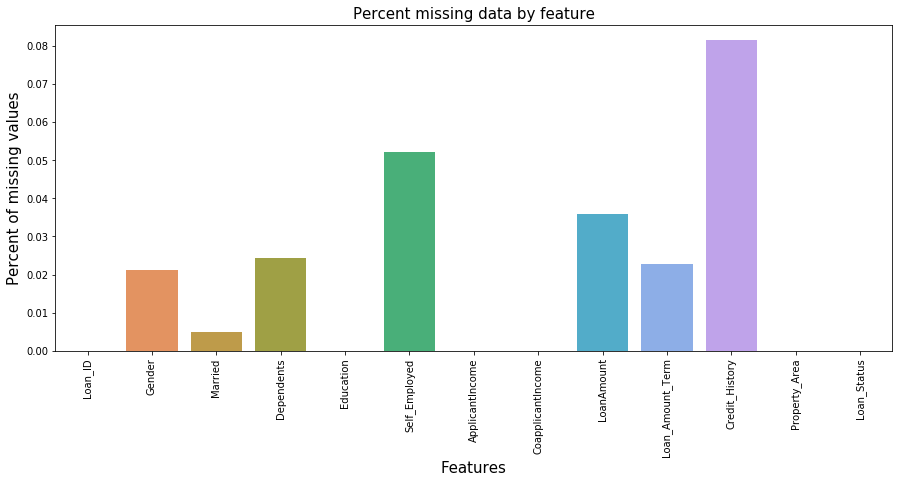

In [15]:
#replacing all missing values by mean
#df.fillna(df.mean(),inplace=True)
#print (df.head())
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
#sns.distplot(df.column_name, bins =30)

pmd=df
total=pmd.isnull().sum()
percent=(pmd.isnull().sum()/pmd.isnull().count())
missingData=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
print (missingData)
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missingData.index, y=missingData['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missingData.head()

In [16]:
#data cleaning
#method 1->ignore the data row containing missing values..
dframe= pd.read_csv("loan_data_set.csv")
print(dframe['LoanAmount'].head())
dframe.isnull().count()
dframe.dropna(inplace=True)
print (dframe['LoanAmount'].head())
#dframe.count()

0      NaN
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64
1    128.0
2     66.0
3    120.0
4    141.0
5    267.0
Name: LoanAmount, dtype: float64


In [4]:
#for back fill

dframe= pd.read_csv("loan_data_set.csv")
dframe.fillna(method='bfill',inplace=True)#for forward-fill
print(dframe['LoanAmount'].head())
dframe.fillna(method='ffill',inplace=True)#forbackward fill

0    128.0
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64


In [5]:
#replace with constant
dframe= pd.read_csv("loan_data_set.csv")
dframe.LoanAmount.fillna(99,inplace=True)
print(dframe['LoanAmount'].head())

0     99.0
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64


In [6]:
dframe= pd.read_csv("loan_data_set.csv")
dframe.LoanAmount.fillna(dframe.LoanAmount.mean(),inplace=True)#by mean
print(dframe.LoanAmount.head())

0    146.412162
1    128.000000
2     66.000000
3    120.000000
4    141.000000
Name: LoanAmount, dtype: float64


In [7]:
dframe= pd.read_csv("loan_data_set.csv")
dframe.LoanAmount.fillna(dframe.LoanAmount.median(),inplace=True)#by median
print(dframe.LoanAmount.head())

0    128.0
1    128.0
2     66.0
3    120.0
4    141.0
Name: LoanAmount, dtype: float64


In [8]:
#now we are gonna insert mean values but within +- standard deviation
dframe= pd.read_csv("loan_data_set.csv")
LoanAmountAverage=dframe['LoanAmount'].mean()
LoanAmountStd=dframe['LoanAmount'].std()
LoanAmountNullCt=dframe['LoanAmount'].isnull().sum();
LoanAmountNullRl=np.random.randint(LoanAmountAverage-LoanAmountStd,LoanAmountAverage+LoanAmountStd,size=LoanAmountNullCt)
dframe['LoanAmount'][np.isnan(dframe['LoanAmount'])]=LoanAmountNullRl
print(dframe.LoanAmount.head())
dframe['LoanAmount'] = dframe['LoanAmount'].astype(int)

NameError: name 'np' is not defined

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from numpy import nan

In [10]:
df= pd.read_csv("loan_data_set.csv")
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df[['CoapplicantIncome','LoanAmount']])
IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None,
                 random_state=0, sample_posterior=False, tol=0.001,
                 verbose=0)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=0)

In [11]:
#print (df.head())
dq=imp.transform(df[['CoapplicantIncome','LoanAmount']])


In [12]:
print (dq)

[[   0.          137.85795547]
 [1508.          128.        ]
 [   0.           66.        ]
 ...
 [ 240.          253.        ]
 [   0.          187.        ]
 [   0.          133.        ]]
